In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Asteroid_Updated.csv')

<ipython-input-4-b63ae7b9b3e7>:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/Asteroid_Updated.csv')


In [5]:
print(dataset.head())
print(dataset.info())
dataset.isnull().sum()

      name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per        

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [6]:
dataset = dataset.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)

In [7]:
dataset = dataset.drop(["name"],axis=1)
print(dataset)
dataset.isnull().sum()

               a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
839709  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
839710  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
839711  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
839712  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
839713  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc condition_code  ...       H  neo pha  \
0       2.979647  4.60

a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
albedo            703305
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [8]:
dataset["a"].fillna(dataset["a"].mean(),inplace=True)
dataset["ad"].fillna(dataset["ad"].mean(),inplace=True)
dataset["per_y"].fillna(dataset["per_y"].mean(),inplace=True)
dataset["n"].fillna(dataset["n"].mean(),inplace=True)
dataset["per"].fillna(dataset["per"].mean(),inplace=True)
dataset["ma"].fillna(dataset["ma"].mean(),inplace=True)
dataset.isnull().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
albedo            703305
moid               16442
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [9]:
y=dataset["neo"]
y.value_counts()

N    818308
Y     21400
Name: neo, dtype: int64

In [10]:
dataset['neo'] = dataset['neo'].map( {'N': -1, 'Y':1} )

In [11]:
y=dataset["neo"]
y.value_counts()

-1.0    818308
 1.0     21400
Name: neo, dtype: int64

In [12]:
y=dataset["pha"]
y.value_counts()

N    821257
Y      2015
Name: pha, dtype: int64

In [13]:
dataset['pha'] = dataset['pha'].map( {'N': -1, 'Y':1} )

In [14]:
y=dataset["pha"]
y.value_counts()

-1.0    821257
 1.0      2015
Name: pha, dtype: int64

In [15]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
E         154
D           1
Name: condition_code, dtype: int64

In [16]:
dataset=dataset[dataset['condition_code']!='E']     

In [17]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
D           1
Name: condition_code, dtype: int64

In [18]:
dataset=dataset[dataset['condition_code']!='D']
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,3.340,-1.0,-1.0,939.4,0.0900,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,4.130,-1.0,-1.0,545,0.1010,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,5.330,-1.0,-1.0,246.596,0.2140,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,3.200,-1.0,-1.0,525.4,0.4228,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,6.850,-1.0,-1.0,106.699,0.2740,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,...,20.400,1.0,1.0,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,...,17.507,-1.0,-1.0,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,...,18.071,-1.0,-1.0,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,...,18.060,-1.0,-1.0,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839559 non-null  float64
 1   e               839559 non-null  float64
 2   i               839559 non-null  float64
 3   om              839559 non-null  float64
 4   w               839559 non-null  float64
 5   q               839559 non-null  float64
 6   ad              839559 non-null  float64
 7   per_y           839559 non-null  float64
 8   data_arc        824085 non-null  float64
 9   condition_code  838692 non-null  object 
 10  n_obs_used      839559 non-null  int64  
 11  H               836870 non-null  float64
 12  neo             839553 non-null  float64
 13  pha             823272 non-null  float64
 14  diameter        137636 non-null  object 
 15  albedo          136409 non-null  float64
 16  moid            823272 non-null  float64
 17  class     

In [20]:
y=dataset["condition_code"]
y.value_counts()

0      540392
0       95711
9       23942
1       22193
5       19766
6       17103
7       15556
8       15474
4       15173
2       14541
1       10568
3        9430
9.0      7224
6.0      5804
2        5563
5        5336
7.0      4946
8.0      4347
3        3133
4        2490
Name: condition_code, dtype: int64

In [21]:
dataset.corr()

<ipython-input-21-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,albedo,moid,n,per,ma
a,1.000000,-0.007132,-0.018973,0.000155,-0.001283,0.025003,0.058672,0.052980,0.000106,-0.000409,-0.008793,-0.026189,-0.000415,-0.110227,0.024907,-0.005133,0.052948,0.001656
e,-0.007132,1.000000,0.132792,0.005204,0.007978,-0.115409,0.086631,0.043546,-0.149614,-0.079494,0.342410,0.498814,0.197500,-0.019379,-0.105112,0.201315,0.043548,-0.015434
i,-0.018973,0.132792,1.000000,-0.015800,-0.000701,0.032010,0.071985,0.040328,-0.140710,-0.071632,-0.098055,0.088954,0.036250,-0.089775,0.040909,0.000080,0.040331,0.007044
om,0.000155,0.005204,-0.015800,1.000000,-0.132300,-0.010910,-0.002044,-0.000796,0.001744,-0.005431,0.002186,0.007088,0.002641,0.000736,-0.011062,0.008957,-0.000796,0.000608
w,-0.001283,0.007978,-0.000701,-0.132300,1.000000,-0.003412,-0.000389,-0.000667,-0.005363,0.003743,-0.004289,0.001343,0.000020,-0.003063,-0.003382,0.003678,-0.000667,-0.007585
q,0.025003,-0.115409,0.032010,-0.010910,-0.003412,1.000000,0.306933,0.109765,-0.028362,-0.029189,-0.436410,-0.107873,-0.036172,-0.262726,0.999742,-0.327805,0.109765,-0.004538
ad,0.058672,0.086631,0.071985,-0.002044,-0.000389,0.306933,1.000000,0.931741,-0.021425,-0.014504,-0.124646,-0.009033,-0.002201,-0.069225,0.307557,-0.098147,0.931741,-0.006125
per_y,0.052980,0.043546,0.040328,-0.000796,-0.000667,0.109765,0.931741,1.000000,-0.008640,-0.005054,-0.043935,-0.002565,-0.000830,-0.019495,0.110164,-0.031431,1.000000,-0.002911
data_arc,0.000106,-0.149614,-0.140710,0.001744,-0.005363,-0.028362,-0.021425,-0.008640,1.000000,0.731487,-0.551013,-0.164473,-0.025969,0.255920,-0.031287,-0.075126,-0.008640,-0.002682
n_obs_used,-0.000409,-0.079494,-0.071632,-0.005431,0.003743,-0.029189,-0.014504,-0.005054,0.731487,1.000000,-0.572316,-0.065878,-0.002101,0.450589,-0.031043,-0.009502,-0.005054,-0.010964


In [22]:
dataset['class'] = dataset['class'].map( {'IEO':0, 'AST':1, 'ATE':2, 'APO':3, 'AMO':4, 'IMB':5, 'MBA':6, 'MCA':7, 'OMB':8, 'PAA':9, 'HYA':10, 'TJN':11, 'CEN':12, 'TNO':13} )
     
y=dataset["class"]
y.value_counts()

6     747292
8      24712
5      17547
7      17341
3      11759
4       8020
11      7383
13      3308
2       1601
12       486
1         84
0         20
10         4
9          2
Name: class, dtype: int64

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839559 non-null  float64
 1   e               839559 non-null  float64
 2   i               839559 non-null  float64
 3   om              839559 non-null  float64
 4   w               839559 non-null  float64
 5   q               839559 non-null  float64
 6   ad              839559 non-null  float64
 7   per_y           839559 non-null  float64
 8   data_arc        824085 non-null  float64
 9   condition_code  838692 non-null  object 
 10  n_obs_used      839559 non-null  int64  
 11  H               836870 non-null  float64
 12  neo             839553 non-null  float64
 13  pha             823272 non-null  float64
 14  diameter        137636 non-null  object 
 15  albedo          136409 non-null  float64
 16  moid            823272 non-null  float64
 17  class     

In [24]:
dataset = dataset.drop(["condition_code"],axis=1)
     
dataset

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.340,-1.0,-1.0,939.4,0.0900,1.594780,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.130,-1.0,-1.0,545,0.1010,1.233240,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.330,-1.0,-1.0,246.596,0.2140,1.034540,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.200,-1.0,-1.0,525.4,0.4228,1.139480,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.850,-1.0,-1.0,106.699,0.2740,1.095890,6,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,118,20.400,1.0,1.0,NaN,NaN,0.032397,3,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,15,17.507,-1.0,-1.0,NaN,NaN,0.956145,6,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,6,18.071,-1.0,-1.0,NaN,NaN,0.893896,6,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,13,18.060,-1.0,-1.0,NaN,NaN,0.680220,6,0.290018,1241.302609,15.320134


In [25]:
dataset.corr()

<ipython-input-25-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
a,1.000000,-0.007132,-0.018973,0.000155,-0.001283,0.025003,0.058672,0.052980,0.000106,-0.000409,-0.008793,-0.026189,-0.000415,-0.110227,0.024907,0.011804,-0.005133,0.052948,0.001656
e,-0.007132,1.000000,0.132792,0.005204,0.007978,-0.115409,0.086631,0.043546,-0.149614,-0.079494,0.342410,0.498814,0.197500,-0.019379,-0.105112,-0.204293,0.201315,0.043548,-0.015434
i,-0.018973,0.132792,1.000000,-0.015800,-0.000701,0.032010,0.071985,0.040328,-0.140710,-0.071632,-0.098055,0.088954,0.036250,-0.089775,0.040909,0.028550,0.000080,0.040331,0.007044
om,0.000155,0.005204,-0.015800,1.000000,-0.132300,-0.010910,-0.002044,-0.000796,0.001744,-0.005431,0.002186,0.007088,0.002641,0.000736,-0.011062,-0.005784,0.008957,-0.000796,0.000608
w,-0.001283,0.007978,-0.000701,-0.132300,1.000000,-0.003412,-0.000389,-0.000667,-0.005363,0.003743,-0.004289,0.001343,0.000020,-0.003063,-0.003382,-0.002848,0.003678,-0.000667,-0.007585
q,0.025003,-0.115409,0.032010,-0.010910,-0.003412,1.000000,0.306933,0.109765,-0.028362,-0.029189,-0.436410,-0.107873,-0.036172,-0.262726,0.999742,0.598364,-0.327805,0.109765,-0.004538
ad,0.058672,0.086631,0.071985,-0.002044,-0.000389,0.306933,1.000000,0.931741,-0.021425,-0.014504,-0.124646,-0.009033,-0.002201,-0.069225,0.307557,0.203049,-0.098147,0.931741,-0.006125
per_y,0.052980,0.043546,0.040328,-0.000796,-0.000667,0.109765,0.931741,1.000000,-0.008640,-0.005054,-0.043935,-0.002565,-0.000830,-0.019495,0.110164,0.077530,-0.031431,1.000000,-0.002911
data_arc,0.000106,-0.149614,-0.140710,0.001744,-0.005363,-0.028362,-0.021425,-0.008640,1.000000,0.731487,-0.551013,-0.164473,-0.025969,0.255920,-0.031287,0.048783,-0.075126,-0.008640,-0.002682
n_obs_used,-0.000409,-0.079494,-0.071632,-0.005431,0.003743,-0.029189,-0.014504,-0.005054,0.731487,1.000000,-0.572316,-0.065878,-0.002101,0.450589,-0.031043,0.007097,-0.009502,-0.005054,-0.010964


In [26]:
dataset.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839559 entries, 0 to 839713
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           839559 non-null  float64
 1   e           839559 non-null  float64
 2   i           839559 non-null  float64
 3   om          839559 non-null  float64
 4   w           839559 non-null  float64
 5   q           839559 non-null  float64
 6   ad          839559 non-null  float64
 7   per_y       839559 non-null  float64
 8   data_arc    824085 non-null  float64
 9   n_obs_used  839559 non-null  int64  
 10  H           836870 non-null  float64
 11  neo         839553 non-null  float64
 12  pha         823272 non-null  float64
 13  diameter    137636 non-null  object 
 14  albedo      136409 non-null  float64
 15  moid        823272 non-null  float64
 16  class       839559 non-null  int64  
 17  n           839559 non-null  float64
 18  per         839559 non-null  float64
 19  ma

In [27]:
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc       15474
n_obs_used         0
H               2689
neo                6
pha            16287
diameter      701923
albedo        703150
moid           16287
class              0
n                  0
per                0
ma                 0
dtype: int64

In [28]:
dataset["data_arc"].fillna(dataset.groupby("n_obs_used")["data_arc"].transform("mean"),inplace=True)
     
dataset["moid"].fillna(dataset.groupby("q")["moid"].transform("mean"),inplace=True)
     
dataset["neo"].fillna(dataset["neo"].mean(),inplace=True)
     
dataset["H"].fillna(dataset.groupby("n")["H"].transform("mean"),inplace=True)
     
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H               2689
neo                0
pha            16287
diameter      701923
albedo        703150
moid           16287
class              0
n                  0
per                0
ma                 0
dtype: int64

In [29]:
dataset["pha"].fillna(dataset["pha"].mode(),inplace=True)
     
dataset["moid"].fillna(dataset["moid"].mean(),inplace=True)
     
dataset["H"].fillna(dataset["H"].mean(),inplace=True)
     
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H                  0
neo                0
pha            16287
diameter      701923
albedo        703150
moid               0
class              0
n                  0
per                0
ma                 0
dtype: int64

In [30]:
y=dataset["pha"]
y.value_counts()

-1.0    821257
 1.0      2015
Name: pha, dtype: int64

In [31]:
dataset["pha"]=dataset["pha"].fillna(-1)
     
dataset.isnull().sum()

a                  0
e                  0
i                  0
om                 0
w                  0
q                  0
ad                 0
per_y              0
data_arc           0
n_obs_used         0
H                  0
neo                0
pha                0
diameter      701923
albedo        703150
moid               0
class              0
n                  0
per                0
ma                 0
dtype: int64

In [32]:
dataset=dataset.dropna()
     
dataset.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
diameter      0
albedo        0
moid          0
class         0
n             0
per           0
ma            0
dtype: int64

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136406 entries, 0 to 810375
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   a           136406 non-null  float64
 1   e           136406 non-null  float64
 2   i           136406 non-null  float64
 3   om          136406 non-null  float64
 4   w           136406 non-null  float64
 5   q           136406 non-null  float64
 6   ad          136406 non-null  float64
 7   per_y       136406 non-null  float64
 8   data_arc    136406 non-null  float64
 9   n_obs_used  136406 non-null  int64  
 10  H           136406 non-null  float64
 11  neo         136406 non-null  float64
 12  pha         136406 non-null  float64
 13  diameter    136406 non-null  object 
 14  albedo      136406 non-null  float64
 15  moid        136406 non-null  float64
 16  class       136406 non-null  int64  
 17  n           136406 non-null  float64
 18  per         136406 non-null  float64
 19  ma

In [34]:
dataset["diameter"] = dataset["diameter"].astype(float)

<ipython-input-34-462e321415db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["diameter"] = dataset["diameter"].astype(float)


<Axes: xlabel='diameter', ylabel='Count'>

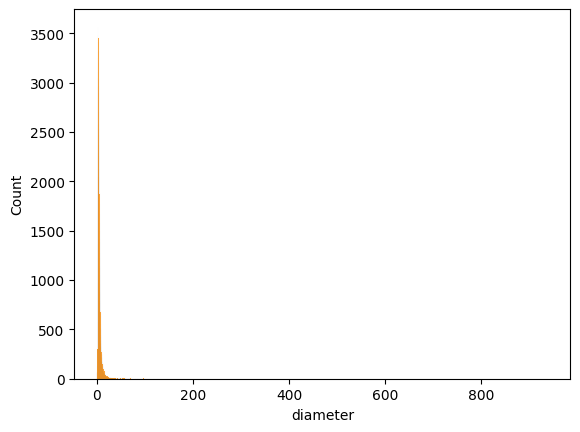

In [35]:
sns.histplot(dataset["diameter"],color='darkorange')

<Axes: xlabel='diameter', ylabel='H'>

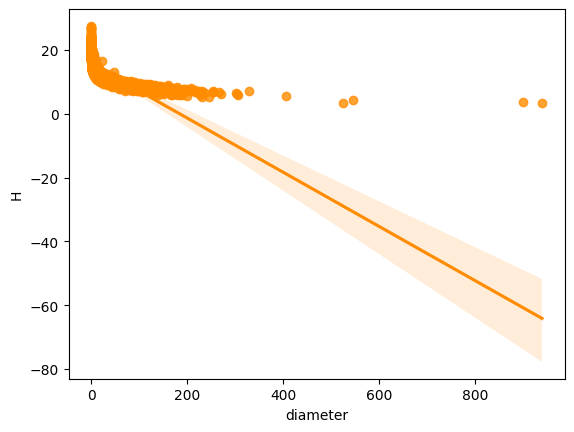

In [36]:
sns.regplot(dataset,x=dataset['diameter'],y=dataset['H'],color='darkorange')

<Axes: xlabel='diameter', ylabel='data_arc'>

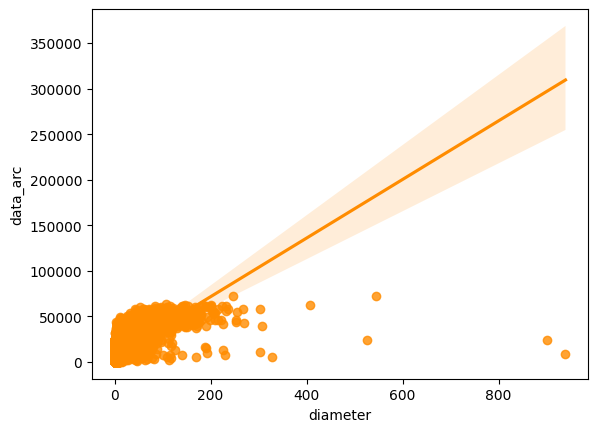

In [37]:
sns.regplot(dataset,x=dataset['diameter'],y=dataset['data_arc'],color='darkorange')

<ipython-input-38-2506428ea76d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['diameter'].dropna())


<Axes: xlabel='diameter', ylabel='Density'>

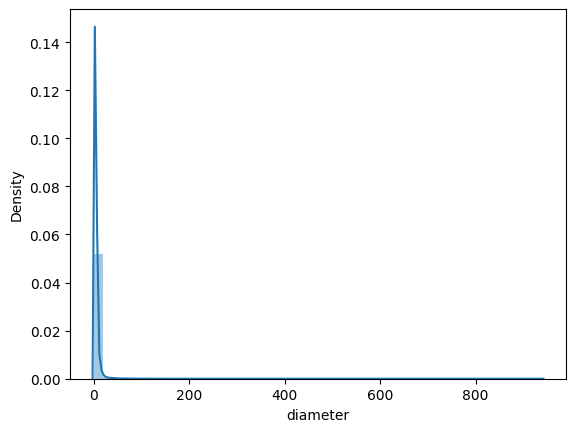

In [38]:
sns.distplot(dataset['diameter'].dropna())

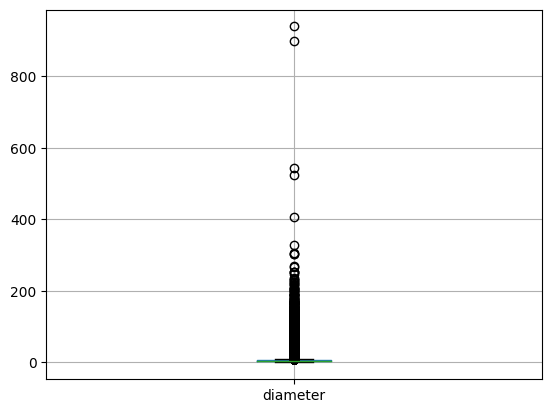

In [39]:
figure=dataset.boxplot(column="diameter")

In [40]:
dataset['diameter'].describe()

count    136406.000000
mean          5.505299
std           9.422372
min           0.008000
25%           2.780000
50%           3.970000
75%           5.764000
max         939.400000
Name: diameter, dtype: float64

In [41]:
IQR=dataset.diameter.quantile(0.75)-dataset.diameter.quantile(0.25)
     
lower_bridge=dataset['diameter'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['diameter'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.696000000000001
10.240000000000002


(None, None)

In [42]:
lower_bridge=dataset['diameter'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['diameter'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-6.172000000000002
14.716000000000001


(None, None)

In [43]:
upper_bridge=dataset['diameter'].quantile(0.9)+(IQR*3)
print(upper_bridge)

17.6015


In [44]:
upper_bridge=dataset['diameter'].quantile(0.95)
print(upper_bridge)

12.13675


In [45]:
upper_bridge=dataset['diameter'].quantile(0.95)+(IQR*3)
print(upper_bridge)

21.08875


In [46]:
upper_bridge=dataset['diameter'].quantile(0.99)+(IQR*3)
print(upper_bridge)

40.90720000000066


In [47]:
dataset=dataset[dataset['diameter']<=50]
     
dataset['diameter'].describe()

count    135645.000000
mean          4.990452
std           4.158836
min           0.008000
25%           2.774000
50%           3.956000
75%           5.720000
max          49.990000
Name: diameter, dtype: float64

<ipython-input-48-5e422195445d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['diameter'].dropna())


<Axes: xlabel='diameter', ylabel='Density'>

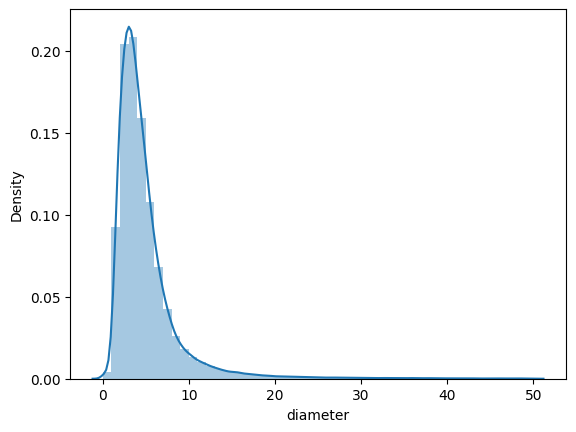

In [48]:
sns.distplot(dataset['diameter'].dropna())     

In [49]:
dataset.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
a,1.000000,0.014880,0.144898,-0.000902,-0.002813,0.320651,0.987461,0.949791,-0.027257,-0.055405,-0.123736,-0.052240,-0.030828,0.187104,-0.110761,0.323795,0.267049,-0.275869,0.949791,0.016288
e,0.014880,1.000000,0.145619,-0.000673,0.012635,-0.563526,0.109407,0.045951,-0.030830,-0.078939,0.210468,0.339081,0.166131,-0.108428,-0.019872,-0.538924,-0.171039,0.188937,0.045951,-0.017150
i,0.144898,0.145619,1.000000,-0.013451,-0.004982,0.080945,0.137335,0.094396,-0.216941,-0.231020,-0.027075,0.101725,0.026573,0.086316,-0.089185,0.123140,0.064483,-0.110611,0.094396,0.014467
om,-0.000902,-0.000673,-0.013451,1.000000,-0.107288,-0.004408,-0.000205,0.000374,-0.001444,-0.024417,0.004243,0.003702,0.000730,-0.000197,0.000740,-0.005276,-0.000790,0.008126,0.000374,-0.003282
w,-0.002813,0.012635,-0.004982,-0.107288,1.000000,-0.008622,-0.001491,-0.001669,-0.006071,0.010449,-0.008397,0.001239,-0.002977,0.001447,-0.003225,-0.008513,-0.001246,0.003461,-0.001669,0.001537
q,0.320651,-0.563526,0.080945,-0.004408,-0.008622,1.000000,0.167105,0.087700,-0.036999,-0.101147,-0.385443,-0.247914,-0.130814,0.460260,-0.278917,0.996372,0.667774,-0.744529,0.087700,0.078164
ad,0.987461,0.109407,0.137335,-0.000205,-0.001491,0.167105,1.000000,0.974023,-0.022205,-0.040814,-0.064559,-0.013059,-0.010287,0.118049,-0.068807,0.170982,0.166680,-0.163069,0.974023,0.003927
per_y,0.949791,0.045951,0.094396,0.000374,-0.001669,0.087700,0.974023,1.000000,-0.009279,-0.011554,-0.032020,-0.007030,-0.004060,0.062271,-0.018928,0.089149,0.079760,-0.056991,1.000000,-0.004531
data_arc,-0.027257,-0.030830,-0.216941,-0.001444,-0.006071,-0.036999,-0.022205,-0.009279,1.000000,0.745167,-0.636851,-0.031196,-0.011547,0.509653,0.292436,-0.046191,0.003548,0.059711,-0.009279,-0.019860
n_obs_used,-0.055405,-0.078939,-0.231020,-0.024417,0.010449,-0.101147,-0.040814,-0.011554,0.745167,1.000000,-0.776683,-0.021266,-0.007222,0.486332,0.473395,-0.112142,-0.056704,0.144467,-0.011554,-0.049766


<ipython-input-50-f49ea5c28868>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['H'].dropna())


<Axes: xlabel='H', ylabel='Density'>

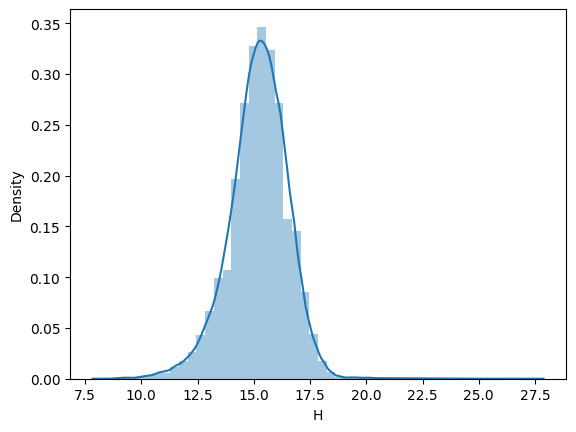

In [50]:
sns.distplot(dataset['H'].dropna())     

In [51]:
uppper_boundary=dataset['H'].mean() + 3* dataset['H'].std()
lower_boundary=dataset['H'].mean() - 3* dataset['H'].std()
print(lower_boundary), print(uppper_boundary),print(dataset['H'].mean())

11.23180588676272
19.183777394499074
15.207791640630896


(None, None, None)

<ipython-input-52-10b242f03382>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['data_arc'].dropna())


<Axes: xlabel='data_arc', ylabel='Density'>

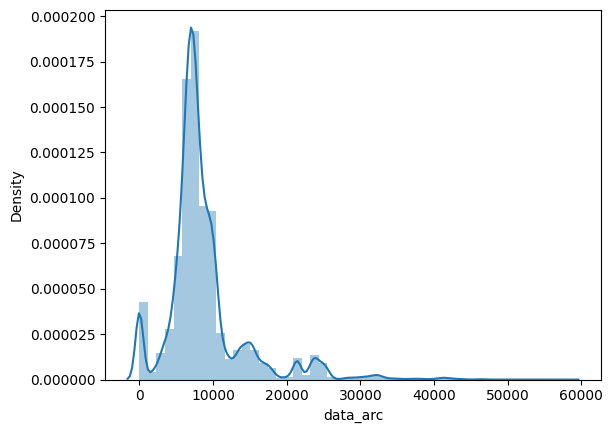

In [52]:
sns.distplot(dataset['data_arc'].dropna())

In [53]:
dataset['data_arc'].describe()

count    135645.000000
mean       8837.831326
std        5646.415202
min           1.000000
25%        6302.000000
50%        7579.000000
75%        9714.000000
max       58007.000000
Name: data_arc, dtype: float64

In [54]:
IQR=dataset.data_arc.quantile(0.75)-dataset.data_arc.quantile(0.25)
lower_bridge=dataset['data_arc'].quantile(0.25)-(IQR*1.5)
upper_bridge=dataset['data_arc'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1184.0
14832.0


(None, None)

In [55]:
IQR=dataset.data_arc.quantile(0.75)-dataset.data_arc.quantile(0.25)
lower_bridge=dataset['data_arc'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['data_arc'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-3934.0
19950.0


(None, None)

In [56]:
upper_bridge=dataset['data_arc'].quantile(0.95)
print(upper_bridge)

21558.0


In [57]:
dataset=dataset[dataset['data_arc']<=35000]
     
dataset['data_arc'].describe()     

count    134974.000000
mean       8677.993378
std        5178.000757
min           1.000000
25%        6297.000000
50%        7567.000000
75%        9662.750000
max       34994.000000
Name: data_arc, dtype: float64

<ipython-input-58-10b242f03382>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['data_arc'].dropna())


<Axes: xlabel='data_arc', ylabel='Density'>

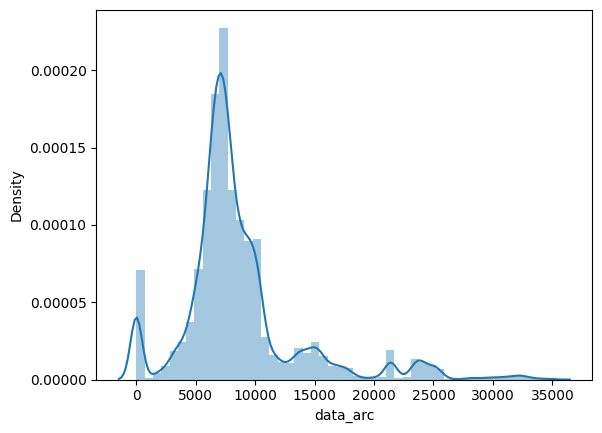

In [58]:
sns.distplot(dataset['data_arc'].dropna())

In [59]:
import scipy.stats as stat
import pylab 
     
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

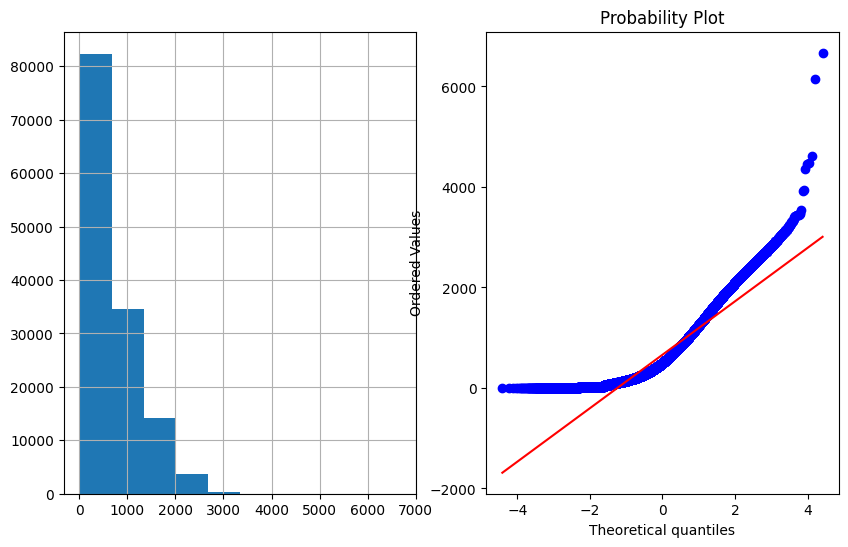

In [60]:
plot_data(dataset,'n_obs_used')

In [61]:
df=dataset

In [62]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,-0.128115,-0.052235,-0.030848,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,0.216437,0.339667,0.166516,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,-0.032448,0.101925,0.026561,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,0.004731,0.003661,0.000740,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,-0.009857,0.001053,-0.003003,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,-0.398973,-0.248185,-0.131067,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,-0.066953,-0.013068,-0.010297,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,-0.033129,-0.007030,-0.004063,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,-0.613145,-0.032979,-0.011440,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,-0.766221,-0.022009,-0.006796,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505


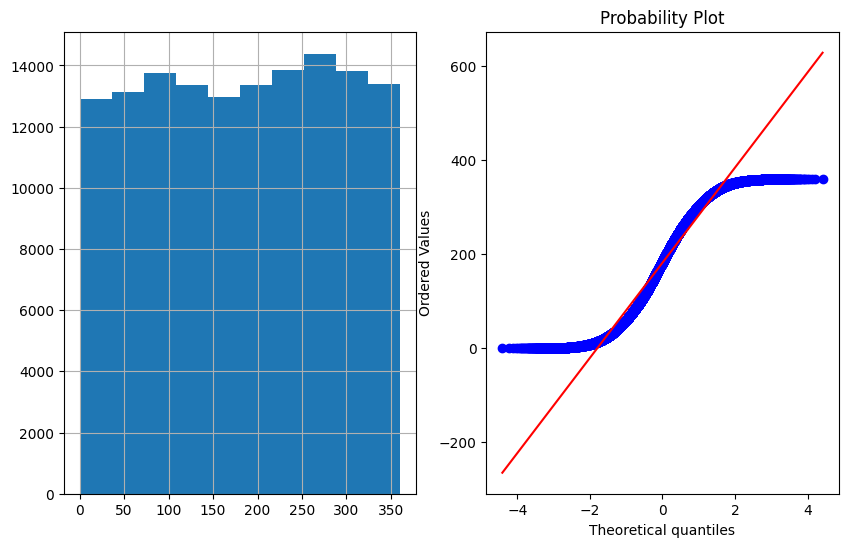

In [63]:
plot_data(dataset,'w')

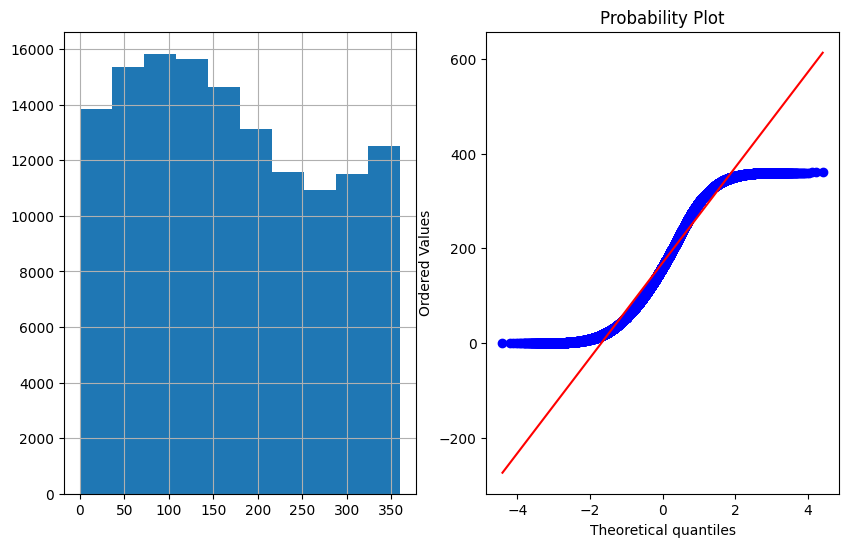

In [64]:
plot_data(dataset,'om')

In [65]:
df['a/ad']=(df['om'])/(df['w'])     

df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,neo,pha,diameter,albedo,moid,class,n,per,ma,a/ad
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,...,-0.052235,-0.030848,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368,-0.000966
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,...,0.339667,0.166516,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401,-0.001552
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,...,0.101925,0.026561,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522,-0.003414
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,...,0.003661,0.000740,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259,0.019780
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,...,0.001053,-0.003003,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364,-0.034309
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,...,-0.248185,-0.131067,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613,-0.001704
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,...,-0.013068,-0.010297,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954,-0.000722
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,...,-0.007030,-0.004063,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537,-0.000209
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,...,-0.032979,-0.011440,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676,-0.004334
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,...,-0.022009,-0.006796,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505,-0.000858


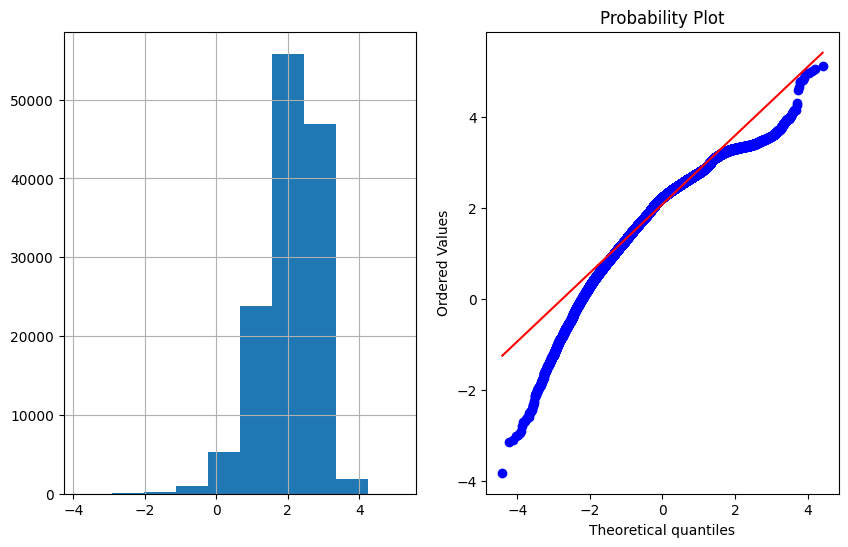

In [66]:
df['e_log']=np.log(df['i'])
plot_data(df,'e_log')

In [67]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,pha,diameter,albedo,moid,class,n,per,ma,a/ad,e_log
a,1.000000,0.014988,0.144930,-0.000861,-0.002853,0.320396,0.987498,0.949897,-0.027342,-0.055632,...,-0.030848,0.205111,-0.110504,0.323534,0.266951,-0.275388,0.949897,0.016368,-0.000966,0.065941
e,0.014988,1.000000,0.145365,-0.000756,0.012690,-0.563385,0.109349,0.046063,-0.034244,-0.080954,...,0.166516,-0.117310,-0.020083,-0.538755,-0.171787,0.189241,0.046063,-0.017401,-0.001552,0.090095
i,0.144930,0.145365,1.000000,-0.013512,-0.005210,0.081016,0.137364,0.094526,-0.227405,-0.231727,...,0.026561,0.101101,-0.088626,0.123202,0.064119,-0.110307,0.094526,0.014522,-0.003414,0.886474
om,-0.000861,-0.000756,-0.013512,1.000000,-0.106952,-0.004323,-0.000177,0.000383,-0.002600,-0.025505,...,0.000740,-0.000697,0.000505,-0.005188,-0.000651,0.008068,0.000383,-0.003259,0.019780,-0.011845
w,-0.002853,0.012690,-0.005210,-0.106952,1.000000,-0.008762,-0.001511,-0.001680,-0.003843,0.012039,...,-0.003003,0.002788,-0.003059,-0.008660,-0.001260,0.003543,-0.001680,0.001364,-0.034309,-0.002703
q,0.320396,-0.563385,0.081016,-0.004323,-0.008762,1.000000,0.167068,0.087718,-0.033963,-0.100913,...,-0.131067,0.504440,-0.278586,0.996368,0.668708,-0.744233,0.087718,0.078613,-0.001704,0.088847
ad,0.987498,0.109349,0.137364,-0.000177,-0.001511,0.167068,1.000000,0.974068,-0.022806,-0.041110,...,-0.010297,0.129541,-0.068656,0.170939,0.166570,-0.162783,0.974068,0.003954,-0.000722,0.053848
per_y,0.949897,0.046063,0.094526,0.000383,-0.001680,0.087718,0.974068,1.000000,-0.009640,-0.011608,...,-0.004063,0.068389,-0.018886,0.089169,0.079772,-0.056940,1.000000,-0.004537,-0.000209,0.024564
data_arc,-0.027342,-0.034244,-0.227405,-0.002600,-0.003843,-0.033963,-0.022806,-0.009640,1.000000,0.734218,...,-0.011440,0.439798,0.303490,-0.043625,0.006860,0.059475,-0.009640,-0.020676,-0.004334,-0.232508
n_obs_used,-0.055632,-0.080954,-0.231727,-0.025505,0.012039,-0.100913,-0.041110,-0.011608,0.734218,1.000000,...,-0.006796,0.456118,0.479699,-0.111973,-0.056472,0.145334,-0.011608,-0.050505,-0.000858,-0.230747


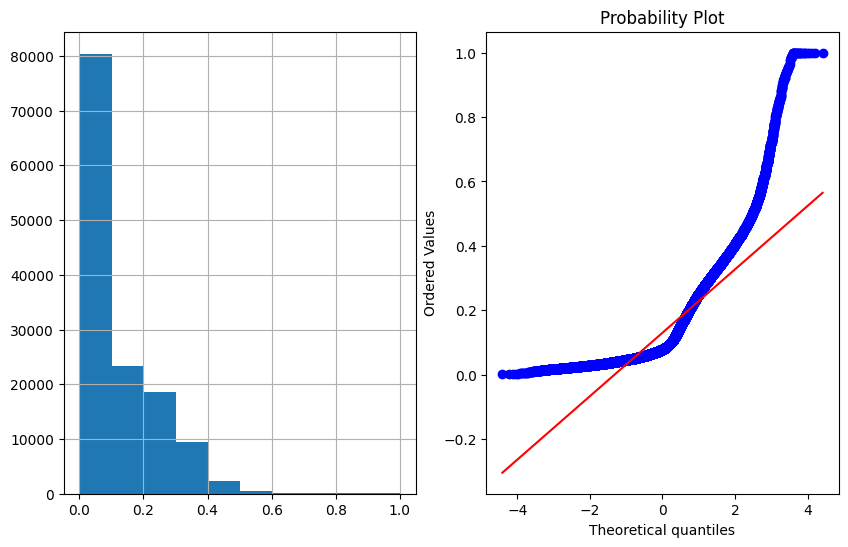

In [68]:
plot_data(df,'albedo')

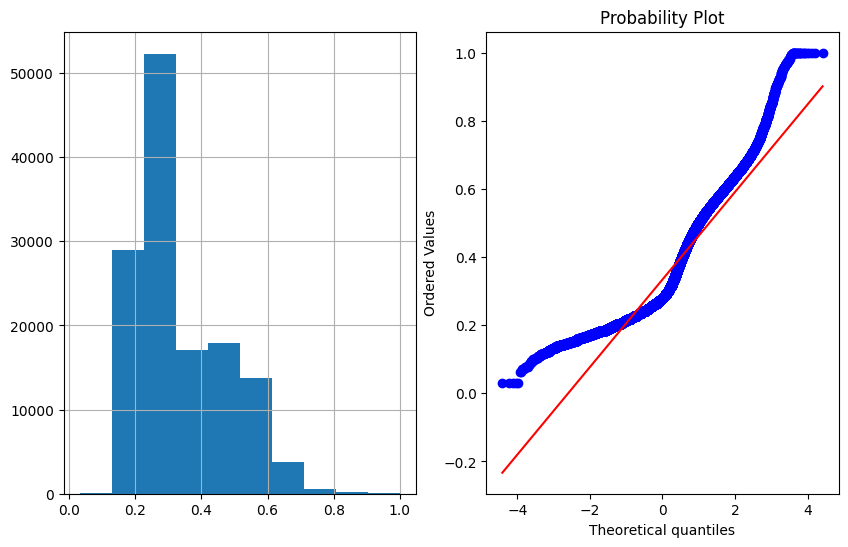

In [69]:
df['albedo_sqaure']=df.albedo**(1/2)
plot_data(df,'albedo_sqaure')

In [70]:
df.corr()['diameter']

a                0.205111
e               -0.117310
i                0.101101
om              -0.000697
w                0.002788
q                0.504440
ad               0.129541
per_y            0.068389
data_arc         0.439798
n_obs_used       0.456118
H               -0.722641
neo             -0.075739
pha             -0.040669
diameter         1.000000
albedo          -0.215648
moid             0.508903
class            0.422067
n               -0.404766
per              0.068389
ma               0.023790
a/ad            -0.001211
e_log            0.079090
albedo_sqaure   -0.214760
Name: diameter, dtype: float64

In [71]:
df = df.drop('e_log',axis=1)

In [73]:
# df = df.drop(["a/ad"],axis=1)
# df = df.drop(["n_obs_used_log"],axis=1)
     
df.corr()['diameter']

a                0.205111
e               -0.117310
i                0.101101
om              -0.000697
w                0.002788
q                0.504440
ad               0.129541
per_y            0.068389
data_arc         0.439798
n_obs_used       0.456118
H               -0.722641
neo             -0.075739
pha             -0.040669
diameter         1.000000
albedo          -0.215648
moid             0.508903
class            0.422067
n               -0.404766
per              0.068389
ma               0.023790
albedo_sqaure   -0.214760
Name: diameter, dtype: float64

In [74]:
df=df.assign(feature3=lambda x:(x.a)*np.sqrt(1-((x.e)**2)))     

df.corr()['diameter']

a                0.205111
e               -0.117310
i                0.101101
om              -0.000697
w                0.002788
q                0.504440
ad               0.129541
per_y            0.068389
data_arc         0.439798
n_obs_used       0.456118
H               -0.722641
neo             -0.075739
pha             -0.040669
diameter         1.000000
albedo          -0.215648
moid             0.508903
class            0.422067
n               -0.404766
per              0.068389
ma               0.023790
albedo_sqaure   -0.214760
feature3         0.470327
Name: diameter, dtype: float64

In [75]:
dataset=df

In [76]:
X = dataset.drop("diameter",axis=1)
y = dataset["diameter"]

In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)

StandardScaler()

In [78]:
sd_data=sc.transform(X)
sd_data = pd.DataFrame(sd_data)
sd_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.307984,1.446014,-0.398851,0.857915,-0.997616,-1.367255,-0.093037,-0.049133,4.574757,3.238208,...,-0.077168,-0.038329,-0.555103,-1.397195,-0.205159,0.962851,-0.049133,-1.351635,-0.526231,-0.892864
1,-0.251253,-1.083786,-1.279787,0.698198,-0.288212,-0.242468,-0.221160,-0.041458,4.459461,3.932180,...,-0.077168,-0.038329,1.099972,-0.270202,-0.205159,0.710130,-0.041458,1.121998,1.229740,-0.606113
2,-0.379703,0.291596,-1.158819,-0.079231,-0.087364,-1.116567,-0.209398,-0.058638,4.747604,3.360674,...,-0.077168,-0.038329,0.790782,-1.186279,-0.205159,1.316982,-0.058638,-1.573667,0.970630,-1.001395
3,-0.046260,0.191728,-1.140800,0.780463,-1.545652,-0.204760,-0.014075,-0.012615,4.951545,3.103318,...,-0.077168,-0.038329,-0.036755,-0.277916,-0.205159,-0.043349,-0.012615,1.121559,0.153745,-0.108819
4,0.023274,1.413581,0.631120,0.775606,-0.027749,-0.582756,0.121197,-0.002449,4.223269,2.169739,...,-0.077168,-0.038329,-0.691510,-0.595182,-0.205159,-0.253488,-0.002449,-0.622664,-0.749481,-0.026366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134969,0.231115,3.689374,2.708688,-0.528136,-0.435022,-1.256660,0.449662,0.029044,-1.241409,-1.088913,...,-0.077168,-0.038329,-0.127693,-1.185657,-0.205159,-0.780294,0.029044,0.122849,0.047813,0.149685
134970,0.241299,0.177313,2.470409,1.355971,-1.565995,0.557814,0.158324,0.030629,-1.217655,-1.083588,...,-0.077168,-0.038329,-0.991606,0.518685,-0.205159,-0.802815,0.030629,-0.174481,-1.393934,0.657495
134971,-0.174615,-0.898043,0.189396,0.745104,-0.113978,-0.093933,-0.166111,-0.030876,-1.039207,-1.113761,...,-0.077168,-0.038329,-0.627853,-0.104467,-0.205159,0.401827,-0.030876,-0.364843,-0.641886,-0.404425
134972,0.161237,1.839021,0.610655,1.695603,1.552252,-0.470517,0.246114,0.018274,-1.249520,-1.124410,...,-0.077168,-0.038329,-0.527821,-0.527004,-0.205159,-0.618120,0.018274,-0.070892,-0.484603,0.282517


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,shuffle=True)     

In [80]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [81]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:4.11467	validation_1-rmse:4.14905
[1]	validation_0-rmse:2.93717	validation_1-rmse:2.97097
[2]	validation_0-rmse:2.11821	validation_1-rmse:2.16468
[3]	validation_0-rmse:1.55896	validation_1-rmse:1.61022
[4]	validation_0-rmse:1.18055	validation_1-rmse:1.23824
[5]	validation_0-rmse:0.93486	validation_1-rmse:0.99866
[6]	validation_0-rmse:0.78135	validation_1-rmse:0.85137
[7]	validation_0-rmse:0.68856	validation_1-rmse:0.76397
[8]	validation_0-rmse:0.63508	validation_1-rmse:0.71298
[9]	validation_0-rmse:0.60393	validation_1-rmse:0.68536
[10]	validation_0-rmse:0.58521	validation_1-rmse:0.66892
[11]	validation_0-rmse:0.57283	validation_1-rmse:0.65926
[12]	validation_0-rmse:0.56533	validation_1-rmse:0.65103
[13]	validation_0-rmse:0.55999	validation_1-rmse:0.64824
[14]	validation_0-rmse:0.55550	validation_1-rmse:0.64543
[15]	validation_0-rmse:0.55160	validation_1-rmse:0.64442
[16]	validation_0-rmse:0.54889	validation_1-rmse:0.64288
[17]	validation_0-rmse:0.54657	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [82]:
pred =  model.predict(X_test)
     
from sklearn.metrics import mean_squared_error
     
mean_squared_error(pred,y_test)

0.4822733426252814

In [83]:
from sklearn.metrics import r2_score
     
r2_score(pred,y_test)

0.9657065075233509

In [84]:
model2 = XGBRegressor(learning_rate=0.05)
     
model2.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:5.52032	validation_1-rmse:5.55545
[1]	validation_0-rmse:5.25197	validation_1-rmse:5.28661
[2]	validation_0-rmse:4.99721	validation_1-rmse:5.03183
[3]	validation_0-rmse:4.75534	validation_1-rmse:4.78952
[4]	validation_0-rmse:4.52551	validation_1-rmse:4.55982
[5]	validation_0-rmse:4.30717	validation_1-rmse:4.34161
[6]	validation_0-rmse:4.10002	validation_1-rmse:4.13379
[7]	validation_0-rmse:3.90334	validation_1-rmse:3.93834
[8]	validation_0-rmse:3.71673	validation_1-rmse:3.75132
[9]	validation_0-rmse:3.53957	validation_1-rmse:3.57373
[10]	validation_0-rmse:3.37109	validation_1-rmse:3.40572
[11]	validation_0-rmse:3.21131	validation_1-rmse:3.24711
[12]	validation_0-rmse:3.05984	validation_1-rmse:3.09559
[13]	validation_0-rmse:2.91622	validation_1-rmse:2.95293
[14]	validation_0-rmse:2.77935	validation_1-rmse:2.81772
[15]	validation_0-rmse:2.64995	validation_1-rmse:2.68936
[16]	validation_0-rmse:2.52690	validation_1-rmse:2.56689
[17]	validation_0-rmse:2.41064	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
pred2 =  model2.predict(X_test)     

mean_squared_error(pred2,y_test)

0.48202692540488873

In [86]:
r2_score(pred2,y_test)

0.9647207279898601

In [87]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [88]:
pred3 = svr.predict(X_test)     

mean_squared_error(pred3,y_test)

5.096299185338949

In [89]:
r2_score(pred3,y_test)

0.25714575007025553

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [91]:
pred4 = regressor.predict(X_test)
     
mean_squared_error(pred4,y_test)

0.8255055720847533

In [92]:
r2_score(pred4,y_test)

0.9427296704965822

In [93]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100, random_state=0,max_samples=0.8,oob_score=True,verbose=1)
regr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min finished


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=100, oob_score=True, random_state=0, verbose=1)

In [94]:
regr.oob_score_

0.9743095970686392

In [95]:
pred5 = regr.predict(X_test)    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [96]:
mean_squared_error(pred5,y_test)     

0.4894245185597643

In [97]:
r2_score(pred5,y_test)

0.9648656508410457

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
reg2 = GradientBoostingRegressor(random_state=0)
reg2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [99]:
pred6 = reg2.predict(X_test)
     
mean_squared_error(pred6,y_test)

0.4959430840312019

In [100]:
r2_score(pred6,y_test)

0.9639106172846329

In [101]:
from tensorflow import keras

In [102]:
def build_model(n_h=1,n_n=30,lr=3e-3,input_shape=X_train.shape[1:]):
    ann = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_h):
        ann.add(keras.layers.Dense(n_n, activation="relu", **options))
        options = {}
    ann.add(keras.layers.Dense(1,activation="linear", **options))
    lr_adp = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lr,decay_steps=100,decay_rate=0.9)
    optimizer1 = keras.optimizers.SGD(lr_adp,momentum=0.9)
    ann.compile(loss='mean_absolute_error', optimizer=optimizer1, metrics=['mean_absolute_error'])
    return ann

In [103]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-103-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [104]:

keras_reg.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid))     

Epoch 1/100
3375/3375 [==============================] - 11s 3ms/step - loss: 152.6977 - mean_absolute_error: 152.6977 - val_loss: 2.2002 - val_mean_absolute_error: 2.2002
Epoch 2/100
3375/3375 [==============================] - 9s 3ms/step - loss: 2.1659 - mean_absolute_error: 2.1659 - val_loss: 2.2002 - val_mean_absolute_error: 2.2002
Epoch 3/100
3375/3375 [==============================] - 9s 3ms/step - loss: 2.1659 - mean_absolute_error: 2.1659 - val_loss: 2.2002 - val_mean_absolute_error: 2.2002
Epoch 4/100
3375/3375 [==============================] - 7s 2ms/step - loss: 2.1659 - mean_absolute_error: 2.1659 - val_loss: 2.2002 - val_mean_absolute_error: 2.2002
Epoch 5/100
3375/3375 [==============================] - 9s 3ms/step - loss: 2.1659 - mean_absolute_error: 2.1659 - val_loss: 2.2002 - val_mean_absolute_error: 2.2002
Epoch 6/100
3375/3375 [==============================] - 8s 2ms/step - loss: 2.1659 - mean_absolute_error: 2.1659 - val_loss: 2.2002 - val_mean_absolute_error: 

In [105]:
pred7 = keras_reg.predict(X_test)

422/422 [==============================] - 1s 2ms/step


In [106]:
mean_squared_error(pred7,y_test)

15.28869306463847

In [107]:
r2_score(pred7,y_test)

-268961532769091.6

In [108]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[90, 110]}
clf = GridSearchCV(regr, parameters)

In [110]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
clf.fit(X_train, y_train)     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        max_samples=0.8, n_estimators=100,
                                        oob_score=True, random_state=0,
                                        verbose=1),
             param_grid={'n_estimators': [90, 110]})

In [112]:
clf.best_params_

{'n_estimators': 110}

In [113]:
final_model = clf.best_estimator_
     
pred8 = final_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [114]:
mean_squared_error(pred8,y_test)

0.4899337192974594

In [115]:
r2_score(pred8,y_test)

0.964832414812665

In [116]:
print(r2_score(pred,y_test))
print(r2_score(pred2,y_test))
print(r2_score(pred3,y_test))
print(r2_score(pred4,y_test))
print(r2_score(pred5,y_test))
print(r2_score(pred6,y_test))
print(r2_score(pred7,y_test))
print(r2_score(pred8,y_test))

0.9657065075233509
0.9647207279898601
0.25714575007025553
0.9427296704965822
0.9648656508410457
0.9639106172846329
-268961532769091.6
0.964832414812665


**FINAL R2_SCORE OF FINAL MODEL = 0.9648656508410457**